<a href="https://colab.research.google.com/github/brunolongo92/ComparadorDeCiudades-Airbnb/blob/master/Ciudad_Bangkok.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Presentación


- Longo, Bruno. Legajo: L-3162/3


Link del archivo csv: [listings.csv](http://data.insideairbnb.com/thailand/central-thailand/bangkok/2022-06-20/visualisations/listings.csv)

Link del archivo de Google Colab: [Bangkok](https://colab.research.google.com/drive/1ZyIlkMI9AHrrXveKwp9ODJd8lXsyuXZ2#scrollTo=yNteRMMQEAuk)

# Problema

El objetivo del presente trabajo es dar respuesta a las dos preguntas que nos hemos formulado. Ellas son:

- ¿CUÁLES SON LOS PRECIOS DE LOS DISTINTOS TIPOS DE ALOJAMIENTO SEGÚN BARRIO?
- ¿CUÁLES SON LOS BARRIOS MÁS POPULARES ENTRE LOS TURISTAS? (teniendo en cuenta cantidad de reviews) 

Para responder a las mismas, accederemos a la información brindada por airbnb acerca de la ciudad de Bangkok (Tailandia) mediante su lectura y procesamiento, utilizando distintas estructuras de datos que nos facilitarán su manejo. 

Para finalizar, plasmaremos los resultados obtenidos en los gráficos que consideremos adecuados con el fin de facilitar su visualización y comprensión.



# Estructuras de datos

A lo largo del desarrollo del trabajo utilizaremos tuplas, listas, diccionarios y algunas de sus combinaciones para poder cargar los datos y trabajar sobre ellos, con el fin de responder las preguntas planteadas anteriormente.

# Carga de datos

En esta sección haremos la lectura y carga de datos. Importaremos el módulo csv y a través de reader podremos leer el mismo, previamente cargado. Antes de eso, crearemos listas y diccionarios vacíos donde almacenaremos la información que vamos a necesitar más adelante, como son los barrios, los precios, las reviews, etc. 

Como datos generales, sabemos que hay 50 barrios con 16616 opciones de alojamiento, divididos en 4 categorias (Casa/depto entero, H.Hotel, H.Priv y H.Compartida). 

In [ ]:
import csv
import pprint
import matplotlib.pyplot as plt
import seaborn as sns
  
precio_por_barrio = {}
barrios = []
precios = []
tipo_aloj = []
reviews = []
barrio_y_su_prom_de_precios = {}
barrio_precios_Hogar = {} #dicc con barrio : lista de precios de hogar
barrio_precios_Hotel = {} #dicc con barrio : lista de precios de hotel
barrio_precios_HabPriv = {} #dicc con barrio : lista de precios de hab privada
barrio_precios_HabComp = {} #dicc con barrio : lista de precios de hab compartida

def lector_csv(file):
  with open(file) as File:
    reader = csv.reader(File, delimiter=',')
    headings = next(reader) #guardamos los encabezados
    num_row = 0
    for row in reader:
      barrios.append(row[5]) # row 5 es nombre de barrio
      tipo_aloj.append(row[8]) # row 8 es tipo de aloj
      precios.append(row[9]) # row 9 es precio
      reviews.append(row[11]) # row 11 son las reviews
      num_row += 1
      if(num_row == 16617): #cantidad de rows que procesamos
        break;

lector_csv("listings.csv")

# Funciones generales

A continuación se detallan algunas funciones que serán utilizadas a lo largo del programa.

In [ ]:
def promedio(lista):
    '''Se le pasa una lista, devuelve el valor promedio 
    de la lista'''    
    return round(sum(lista)/len(lista),1)

def ValorPromedio(diccionario):
  '''Esta función recibe como parámetro un diccionario, y agrega sus valores (números) a una lista.
   Luego, devuelve el valor promedio de ella.'''
  listaconvalores = []
  for valor in diccionario.values():
    listaconvalores.append(valor)
  return (sum(listaconvalores) / len(listaconvalores))


Como primer pregunta, buscamos responder: ¿CUÁLES SON LOS PRECIOS DE LOS DISTINTOS TIPOS DE ALOJAMIENTO SEGÚN BARRIO?

Para ello, haremos uso de varios de los diccionarios previamente creados en la sección "carga de datos", y con la ayuda de bucles de repetición y otras funciones estableceremos un comparador para que el usuario ingrese dos de los barrios tailandeses a elección y pueda visualizar sus gráficos de barra, respectivamente. En ellos se detallarán, según el tipo de alojamiento, sus precios promedio.

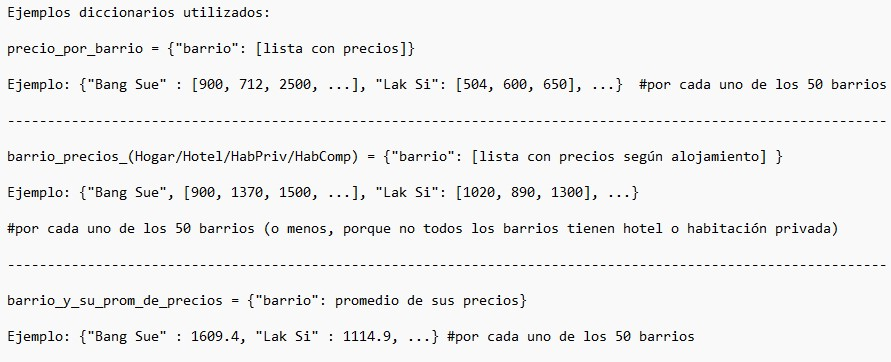

In [ ]:
for i in range (len(barrios)): # creamos el diccionario que contiene str(barrio):lista(int(precios)) 
  if barrios[i] in precio_por_barrio.keys():
    precio_por_barrio[barrios[i]].append(int(precios[i]))
  else:
    precio_por_barrio[barrios[i].title()]=[int(precios[i])]

for i in range (len(barrios)): # clasifica en 4 diccionarios, cada uno contiene barrio : lista de precios según alojamiento
  if tipo_aloj[i] == "Entire home/apt" and barrios[i] in barrio_precios_Hogar.keys():
    barrio_precios_Hogar[barrios[i]].append(int(precios[i]))
  elif tipo_aloj[i] == "Entire home/apt" and barrios[i] not in barrio_precios_Hogar.keys():
    barrio_precios_Hogar[barrios[i]]=[int(precios[i])]
  elif tipo_aloj[i] == "Private room" and barrios[i] in barrio_precios_HabPriv.keys():
    barrio_precios_HabPriv[barrios[i]].append(int(precios[i]))
  elif tipo_aloj[i] == "Private room" and barrios[i] not in barrio_precios_HabPriv.keys():  
    barrio_precios_HabPriv[barrios[i]]=[int(precios[i])]
  elif tipo_aloj[i] == "Hotel room" and barrios[i] in barrio_precios_Hotel.keys():
    barrio_precios_Hotel[barrios[i]].append(int(precios[i]))
  elif tipo_aloj[i] == "Hotel room" and barrios[i] not in barrio_precios_Hotel.keys():
    barrio_precios_Hotel[barrios[i]]=[int(precios[i])]
  elif tipo_aloj[i] == "Shared room" and barrios[i] in barrio_precios_HabComp.keys():
    barrio_precios_HabComp[barrios[i]].append(int(precios[i]))
  elif tipo_aloj[i] == "Shared room" and barrios[i] not in barrio_precios_HabComp.keys():
    barrio_precios_HabComp[barrios[i]]=[int(precios[i])]

print("LISTA DE BARRIO Y EL PROMEDIO DE SUS PRECIOS, ESCRIBA LOS NOMBRES DE LOS QUE DESEE COMPARAR")
for clave, valor in precio_por_barrio.items(): #muestra dicc con barrio : promedio de precios para usar sus nombres en el input
  barrio_y_su_prom_de_precios[clave] = promedio(valor) 
  print (clave, promedio(valor)) #{"barrio": valor promedio}
print("LISTA DE BARRIO Y EL PROMEDIO DE SUS PRECIOS, ESCRIBA LOS NOMBRES DE LOS QUE DESEE COMPARAR")

def buscador(barrio):
    '''Ingresa nombre del barrio y devuelve un gráfico con los valores de alquiler de la sig forma:
    barrio -> [$promedio, $promedio_casa, $promedio_hotel, $promedio_priv, $promedio_comp]'''   
    etiquetas = ["$General","$Hogar","$Hoteles","$Hab.Priv","$Hab.Comp"]  #Etiquetas del eje x (en orden) que se mostrarán en el gráfico
    lista = []    
    lista.append(promedio(precio_por_barrio[barrio])) #Corresponde al primer dato que muestra el gráfico ($General)
    if barrio not in barrio_precios_Hogar.keys():  #Si el barrio no tiene alojamientos tipo Hogar:
      lista.append(0)
    else:
      lista.append(promedio(barrio_precios_Hogar[barrio]))
    if barrio not in barrio_precios_Hotel.keys(): #Si el barrio no tiene alojamientos tipo Hotel:
      lista.append(0)
    else:
      lista.append(promedio(barrio_precios_Hotel[barrio])) 
    if barrio not in barrio_precios_HabPriv.keys(): #Si el barrio no tiene alojamientos tipo Habitación Privada:
      lista.append(0)
    else:
      lista.append(promedio(barrio_precios_HabPriv[barrio]))
    if barrio not in barrio_precios_HabComp.keys(): #Si el barrio no tiene alojamientos tipo Habitación Compartida:
      lista.append(0)
    else:
      lista.append(promedio(barrio_precios_HabComp[barrio]))
    fig, ax = plt.subplots()
    for i, v in enumerate(lista):
      ax.text(i - .33, i +3, str(v), color='black', fontsize=13)
    plot = (plt.bar(etiquetas, lista) , plt.xticks(rotation = 60), plt.title(barrio,fontsize=20),plt.ylabel('Precio',fontsize=15))
    return plt.show()

def comparador(barrio1, barrio2):
  '''Recibe el nombre de 2 barrios para compararlos, devolviendo el gráfico de ambos'''
  buscador(barrio1.title())
  buscador(barrio2.title())
  return

comparador(input("Ingrese primer barrio "), input("Ingrese segundo barrio "))

LISTA DE BARRIO Y EL PROMEDIO DE SUS PRECIOS, ESCRIBA LOS NOMBRES DE LOS QUE DESEE COMPARAR
Bang Sue 1609.4
Lak Si 1114.9
Ratchathewi 1862.4
Don Mueang 1234.1
Khlong Sam Wa 2200.5
Bang Na 1649.3
Bang Kapi 1395.6
Thawi Watthana 1574.6
Yan Na Wa 1200.0
Parthum Wan 3479.8
Suanluang 1673.9
Din Daeng 2541.7
Vadhana 2809.0
Rat Burana 2410.3
Khlong Toei 3070.9
Bang Rak 2668.2
Saphan Sung 2348.2
Sathon 1818.1
Lat Krabang 3863.2
Min Buri 1554.7
Bangkok Yai 2014.2
Bang Phlat 1366.5
Phaya Thai 1800.9
Khlong San 2302.5
Chatu Chak 1810.9
Bang Kho Laen 3500.0
Sai Mai 1619.3
Wang Thong Lang 1412.4
Huai Khwang 2060.6
Phasi Charoen 1357.9
Phra Khanong 1665.6
Nong Chok 3553.9
Pra Wet 2062.0
Phra Nakhon 1583.7
Bang Khen 1313.5
Thon Buri 720.0
Dusit 2789.4
Bueng Kum 2319.7
Samphanthawong 2484.8
Chom Thong 2025.8
Khan Na Yao 2071.8
Lat Phrao 2984.9
Bangkok Noi 2120.3
Nong Khaem 1477.7
Pom Prap Sattru Phai 1753.7
Bang Khae 4781.7
Thung Khru 639.0
Bang Khun Thain 3840.0
Taling Chan 4375.6
Bang Bon 1518.5
LIS

KeyboardInterrupt: ignored

# Segunda pregunta

Finalmente, como segunda pregunta, nuestro objetivo es responder: ¿CUÁLES SON LOS BARRIOS MÁS POPULARES ENTRE LOS TURISTAS? (teniendo en cuenta cantidad de reviews) 

De manera similar a lo planteado en la pregunta número 1, utilizaremos tuplas, listas y diccionarios para manipular la información. Luego, se mostrará el barrio más popular (con su respectiva cantidad total de reviews) y se finalizará con un gráfico de torta y uno de barras representando los barrios que superan el promedio, quedando así respondida la pregunta acerca de los barrios más populares.

In [ ]:
reviews_por_barrio = {}

'''Se recorre cada fila, agregando el nombre del barrio como clave del diccionario y las 
   reviews como valores. Si el nombre del barrio ya existe como clave, se agrega la review 
   correspondiente a la lista que se encuentra como valor.''' 

for i in range (len(barrios)): #diccionario = {"nombre barrio" = lista de reviews}
  if barrios[i] in reviews_por_barrio.keys():
    reviews_por_barrio[barrios[i]].append(int(reviews[i]))
  else:
    reviews_por_barrio[barrios[i]]=[int(reviews[i])]

def SumaDeClaves(diccionario): #Recibe un diccionario {"clave": [lista con números]}
  '''Recibe un diccionario. Suma sus claves (números en una lista).'''
  for clave, valor in diccionario.items():
    diccionario[clave] = sum(valor)
  return diccionario  #Devuelve un diccionario {"clave" : número (producto de una suma)}

def MaximoValor(diccionario): #Recibe un diccionario {"clave" : numero}
  '''Recibe un diccionario y devuelve el máximo valor que encuentra en los valores'''
  listaconvalores = []
  for valor in diccionario.values():
    listaconvalores.append(valor)
  return max(listaconvalores) #Devuelve un número

def CualEsLaClave(diccionario, valor_dado): #Recibe 2 parámetros. El primero, un diccionario; el segundo, un valor(str, int, etc)
  '''Recibe un diccionario. Busca entre los valores el parámetro(valor_dado) brindado por el usuario.
  Si lo encuentra, devuelve la/s clave/s asociada/s a él '''
  claves_asociadas = []   #Creo una lista y no una variable por si se encuentran 2 claves distintas con el mismo valor.
  for clave, valor in diccionario.items():
    if diccionario[clave] == valor_dado:
      claves_asociadas.append(clave)
  return claves_asociadas #Devuelve una variable


SumaDeClaves(reviews_por_barrio) #Llamo a SumaDeClaves. Devuelve el mismo diccionario, pero sus valores ahora son números y no listas.

review_maxima = MaximoValor(reviews_por_barrio)   #Llamo a MáximoValor y almaceno lo que devuelve (el valor máximo) en la variable review_maxima

barrio_mas_popular = CualEsLaClave(reviews_por_barrio, review_maxima) #Llamo a CualEsLaClave y almaceno en una variable el barrio más popular (aquél con mayor cant. de reviews)


print("El barrio más popular es: ", barrio_mas_popular, " y tiene un total de ", review_maxima, " reviews." ) # Respuesta esperada: Khlong Toei, 38367


El barrio más popular es:  ['Khlong Toei']  y tiene un total de  38367  reviews.


A continuación se mostrarán dos gráficos correspondientes a la pregunta número 2, uno de torta y otro de barras. Nuestra intención es mostrar aquellos barrios cuya cantidad de reviews SUPERAN al promedio. Para ello buscaremos cuál dicho promedio, y filtraremos sólo aquellos barrios cuya cantidad de reviews sea mayor.

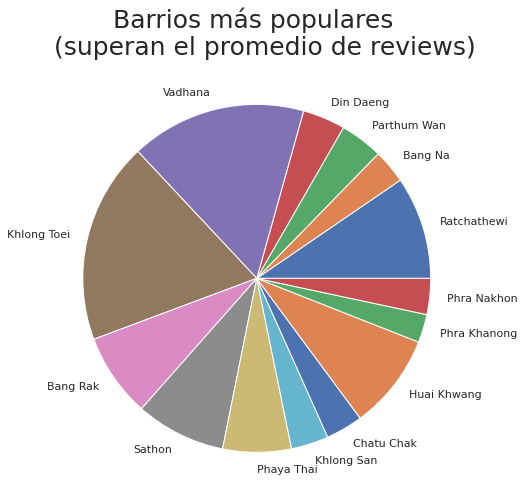

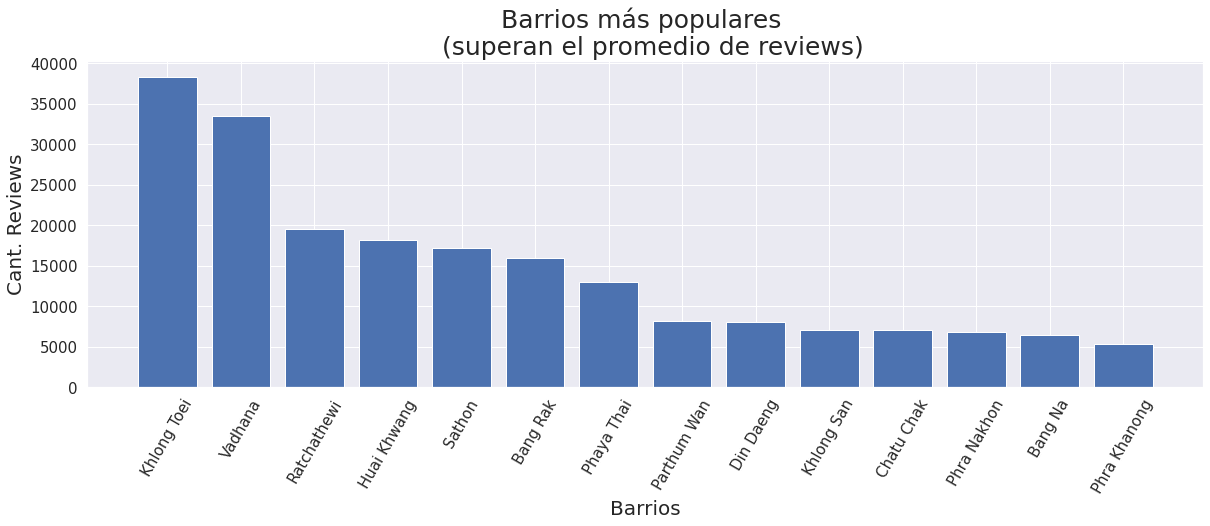

In [ ]:
import operator #Módulo utilizado para ordenar de mayor a menor un diccionario (según sus valores)
barrios_mas_populares = {}
sns.set()
  
promedio_reviews = ValorPromedio(reviews_por_barrio)  #Llamo a la función ValorPromedio. Guardo lo que devuelve (promedio de los valores de un diccionario) en la variable.

def ComparaValores(diccionario, valor_dado): #Recibe 2 parámetros. El primero, un diccionario; el segundo, un valor que servirá como "filtro"
  '''Recibe un diccionario. Compara todas sus claves con un parámetro (valor_dado) brindado por el usuario.
  Se queda sólo con aquellos que lo superan. Devuelve un nuevo diccionario con dichos datos filtrados'''
  diccionario_filtrado = {}
  for clave, valor in diccionario.items():
    if valor > valor_dado:
      diccionario_filtrado[clave] = valor
  return(diccionario_filtrado) #Devuelve un diccionario con aquellos datos "filtrados"

barrios_mas_populares = ComparaValores(reviews_por_barrio, promedio_reviews) #Me quedo con los barrios más populares.

def OrdenaValores(diccionario):
  '''Recibe un diccionario. Ordena de mayor a menor según sus VALORES'''
  lista_ordenada = sorted(diccionario.items(), key = operator.itemgetter(1), reverse = True) #Sorted devuelve una lista con tuplas.
  return lista_ordenada #Devuelve una lista con tuplas [(barrio_pop_1, reviews), (barrio_pop_2, reviews), ...]

lista_barrios_ordenados = OrdenaValores(barrios_mas_populares)  #Ordeno de mayor a menor (en cantidad de reviews) los barrios más populares.

def SeparaElementos(lista_de_tuplas): #[(elem1, elem2), (elem1,elem2), (elem1, elem2)], donde elem1 son barrios y elem2 son su totalidad de reviews
  lista1 = []
  lista2 = []
  for elemento in lista_de_tuplas:
    lista1.append(elemento[0])
    lista2.append(elemento[1])
  return lista1, lista2 

barrios_ordenados = []
reviews_ordenadas = []

barrios_ordenados, reviews_ordenadas = SeparaElementos(lista_barrios_ordenados)   #Separar los elementos en listas nos servirá para el gráfico de barras.

#FUNCIÓN GRÁFICO DE TORTA 

def grafico_torta(titulo, etiquetas, datos):
  plt.figure(figsize = (15,8))
  plt.title(titulo, fontsize = 25) #titulo del gráfico y tamaño de la fuente
  plt.pie(datos, labels  = etiquetas)

#FUNCIÓN GRÁFICO DE BARRAS 

def grafico_barras(titulo, etiqueta_x, etiqueta_y, datos_x, datos_y):
  plt.figure(figsize = (20,6)) #Da las dimensiones de la figura
  plt.xticks(rotation = 60,fontsize = 15); #Rota las etiquetas del eje x y tamaño de la fuente de los valores del eje x
  plt.yticks(fontsize = 15); #Tamaño de la fuente de los valores del eje y
  plt.xlabel(etiqueta_x, fontsize = 20) #Indica qué representa el eje x
  plt.ylabel(etiqueta_y, fontsize = 20) #Indica qué representa el eje y
  plt.title(titulo, fontsize = 25) #Título del gráfico y tamaño de la fuente
  plt.bar(datos_x, datos_y) #Pasamos los datos a graficar


# pprint.pprint(barrios_mas_populares)
grafico_torta("Barrios más populares \n  (superan el promedio de reviews)", barrios_mas_populares.keys(), barrios_mas_populares.values())
grafico_barras("Barrios más populares \n  (superan el promedio de reviews)","Barrios", "Cant. Reviews", barrios_ordenados, reviews_ordenadas)
